We test the M&uuml;ller-Brown potential given by 
\begin{aligned}
E_{MB}(x,y)=\sum_{i=1}^{4}A_{i}\exp [a_{i}(x-\bar{x}_{i})^{2}+b_{i}(x-\bar{x}_{i})(y-\bar{y}_{i})+c_{i}(y-\bar{y}_{i})^{2}].
\end{aligned}
We set the parameters as
\begin{aligned}
A=[-200,-100,-170,15], a=[-1,-1,-6.5,0.7], b=[0,0,11,0.6], c=[-10,-10,-6.5,0.7], \bar{x}=[1,0,-0.5,-1], \bar{y}=[0,0.5,1.5,1].
\end{aligned}

First, we add the path of the `soluscape-1.0` directory to the system path.

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'soluscape-1.0')))


Then, we import the main class.

In [2]:
from soluscape import Landscape
import numpy as np

# import packages needed

We define the energy function.

In [3]:
MBP_energyfunc='-200*exp(-1*(x1-1)**2-10*(x2-0)**2)-100*exp(-1*(x1-0)**2-10*(x2-0.5)**2)-170*exp(-6.5*(x1+0.5)**2' \
'+11*(x1+0.5)*(x2-1.5)-6.5*(x2-1.5)**2)+15*exp(0.7*(x1+1)**2+0.6*(x1+1)*(x2-1)+0.7*(x2-1)**2)'

We initialize the solver and run it.

In [4]:
# parameter initialization
x0 = np.array([0.15, 0.25]) # initial point
dt = 4e-4 # time step
k = 1 # the maximum index of saddle point
acceme = 'none' # use the heavy ball to accelerate
maxiter = 5000 # max iter

In [5]:
MyLandscape = Landscape(MaxIndex=k, AutoGrad=True, ExactHessian=True, EnergyFunction=MBP_energyfunc, 
						InitialPoint=x0, TimeStep=dt, Acceleration=acceme,
						EigenStepSize=1e-7, MaxIter=maxiter,EigenMethod='euler', Verbose=True, ReportInterval=100)
# Instantiation
MyLandscape.Run()
# Calculate

HiSD Solver Configuration:
------------------------------
[HiSD] Current parameters (initialized):
[Config Sync] `Dim` parameter auto-adjusted to 2 based on `InitialPoint` dimensionality.
Parameter `NumericalGrad` not specified - using default value False.
Using `EnergyFunction` instead of `Grad` - enabling auto-differentiation mode.
Parameter `Momentum` not specified - using default value 0.0.
Parameter `BBStep` not specified - using default value False.
Parameter `DimerLength` not specified - using default value 1e-05.
Parameter `Tolerance` not specified - using default value 1e-06.
Parameter `NesterovChoice` not specified - using default value 1.
Parameter `SearchArea` not specified - using default value 1000.0.
Parameter `NesterovRestart` not specified - using default value None.
Parameter `EigenMaxIter` not specified - using default value 10.
Parameter `HessianDimerLength` not specified - using default value 1e-05.
Parameter `PrecisionTol` not specified - using default value 1e-05

We draw the search trajectory.

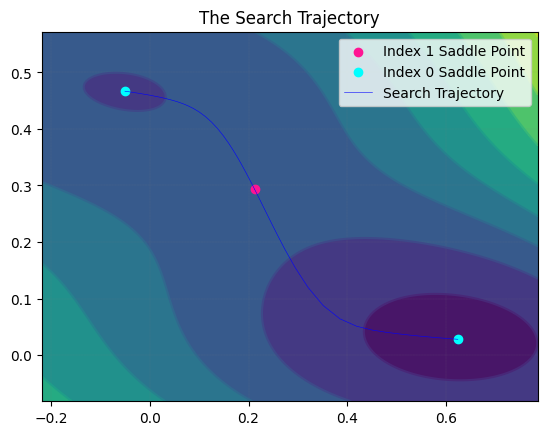

In [6]:
MyLandscape.DrawTrajectory(ContourGridNum=100, ContourGridOut=25, DetailedTraj=True)
# Draw the search path.

We can also draw the solution landscape.

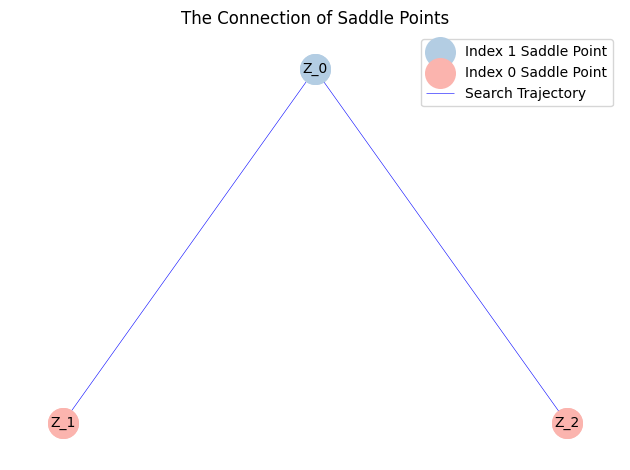

In [7]:
MyLandscape.DrawConnection()

However, this solution landscape is not completed. We restart the algorithm from ID-1 saddle point.

In [8]:
MyLandscape.RestartFromSaddle(1,-np.array([[-0.01],[0]]),1)
# Calculate



From initial point search index-1:
------------------------------


Iteration: 100|| Norm of gradient: 3.005940
Iteration: 200|| Norm of gradient: 0.692884
Iteration: 300|| Norm of gradient: 0.000017
Non-degenerate saddle point identified: Morse index =1 (number of negative eigenvalues).


From saddle point (index-1, ID-3) search index-0:
------------------------------


Iteration: 100|| Norm of gradient: 0.002506
Non-degenerate saddle point identified: Morse index =0 (number of negative eigenvalues).


From saddle point (index-1, ID-3) search index-0:
------------------------------


Iteration: 100|| Norm of gradient: 0.349978
Iteration: 200|| Norm of gradient: 0.000033
Non-degenerate saddle point identified: Morse index =0 (number of negative eigenvalues).


From saddle point (index-1, ID-3) search index-0:
------------------------------


Iteration: 100|| Norm of gradient: 0.392811
Iteration: 200|| Norm of gradient: 0.000038
Non-degenerate saddle point identified: Morse index =0 (

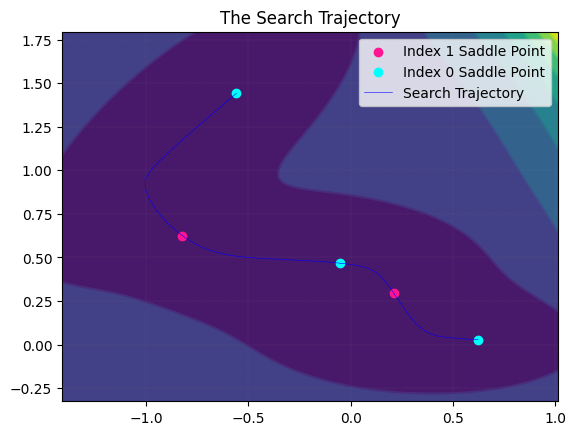

In [9]:
MyLandscape.DrawTrajectory(ContourGridNum=100, ContourGridOut=25, DetailedTraj=True)
# Draw the search path. But because of the large dimension, we cannot draw the picture.

From the output, we can find a complete solution landscape.

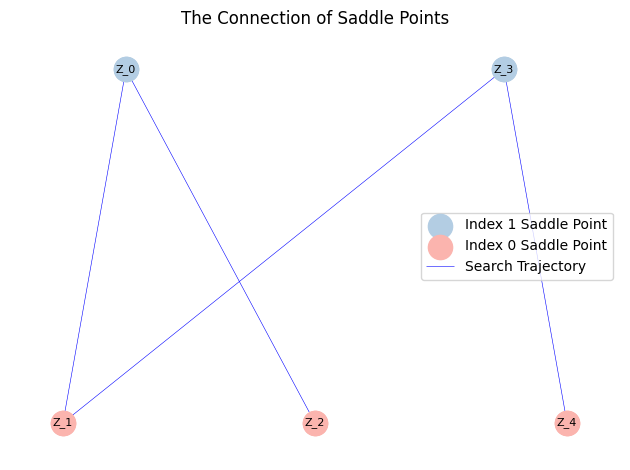

In [10]:
MyLandscape.DrawConnection()
MyLandscape.Save('output\Ex_MBP','pickle')
# Save the data